## 코랩에서 작동 시킬 것 

In [ ]:
### 나눔 고딕 설치
!apt-get update -qq # 설치를 업데이트
!apt-get install fonts-nanum* -qq # 설치한다. fonts-nanum*

In [ ]:
import matplotlib.font_manager as fm # 폰트 관련 용도
import matplotlib.pyplot as plt # 그래프 그리는 용도
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' # 설치된 나눔 글꼴중 원하는 녀석의 전체
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# 우선 fm._rebuild() 를 해주고 # 폰트 매니저 재빌드가 필요하다.
fm._rebuild()

NanumGothic Eco


## 런타임 다시시작

In [ ]:
%matplotlib inline
import matplotlib as mpl # 기본 설정 만지는 용도
import matplotlib.pyplot as plt # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도
import numpy as np
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' # 설치된 나눔글꼴중 원하는 녀석의 전체
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
## 음수 표시되도록 설정
mpl.rcParams['axes.unicode_minus'] = False

NanumGothic Eco


In [ ]:
pip install konlpy

In [ ]:
import nltk
from konlpy.tag import Kkma ### 꼬꼬마
from konlpy.tag import Hannanum ### 한나눔

In [ ]:
### wordcloud와 이미지 표시
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [ ]:
### 데이터 읽기
### 코랩 파일에 다시 넣기 , 런타임 끝나면 자동 삭제됨
doc_ko = open("hansik_review_ver2.txt").read()
doc_ko[0:3000]

In [ ]:
# OKT 클래스를 이용한 명사확인 Okt (11초 : 4286), Kkma (37초 : 5572)
from konlpy.tag import Okt ### Okt를 활용하여 명사를 가져옴
t = Okt()

doc_nouns = t.nouns(doc_ko)
print( len( doc_nouns ) )

14894


In [ ]:
# nltk.Text()를 이용하여 nltk가 가지는 많은 기능을 사용 가능해짐.
ko = nltk.Text(doc_nouns, name="한식리뷰") # nltk는 영어 자연어 처리, 띄어쓰기 단위를 token이라고 함 
print(type(ko))
print(len(ko.tokens))   #그냥 해봄 

<class 'nltk.text.Text'>
14894


In [ ]:
### 단어들의 사용 횟수 확인 - 빈도 분석
type( ko.vocab() ), ko.vocab().most_common(50)

(nltk.probability.FreqDist,
 [('맛', 311),
  ('것', 182),
  ('고기', 173),
  ('곳', 158),
  ('수', 123),
  ('방문', 122),
  ('정말', 109),
  ('이', 98),
  ('집', 96),
  ('생각', 88),
  ('더', 84),
  ('국물', 82),
  ('가격', 82),
  ('냉면', 81),
  ('정도', 80),
  ('때', 78),
  ('메뉴', 75),
  ('주문', 69),
  ('양념', 66),
  ('음식', 66),
  ('밥', 64),
  ('갈비', 63),
  ('진짜', 62),
  ('다른', 60),
  ('좀', 59),
  ('느낌', 58),
  ('추천', 58),
  ('그', 58),
  ('맛집', 56),
  ('안', 54),
  ('사람', 51),
  ('또', 50),
  ('식당', 49),
  ('점', 49),
  ('하나', 48),
  ('조금', 46),
  ('육수', 46),
  ('식사', 46),
  ('다음', 45),
  ('향', 45),
  ('말', 45),
  ('처음', 45),
  ('소스', 44),
  ('내', 44),
  ('그냥', 42),
  ('김치', 42),
  ('닭', 42),
  ('재', 40),
  ('술', 40),
  ('여기', 40)])

In [ ]:
### 한글에서는 따로 불용어 사전 라이브러리 없어, 따로 만들거나 또는 파일로 부터 불러올 수 있다.
stop_words = ['여기', '그', '좀', '내','고기','갈비','방문',
'하나', '조금', '식사', '다음', '말','재','김밥','테이블',
'점', '또', '음식', '때', '정도','것','곳','수',
'다른', '생각', '이', '안', '진짜','냉면','정말','메뉴']
new_ko = [ ]   #여기서 부터가 한글의 경우에 추가되는 부분
for one_word in ko:
  if one_word not in stop_words:  # 만약 one_word가 stop_word에 없으면 new_ko에 더하겠다. 
   new_ko.append(one_word)



In [ ]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

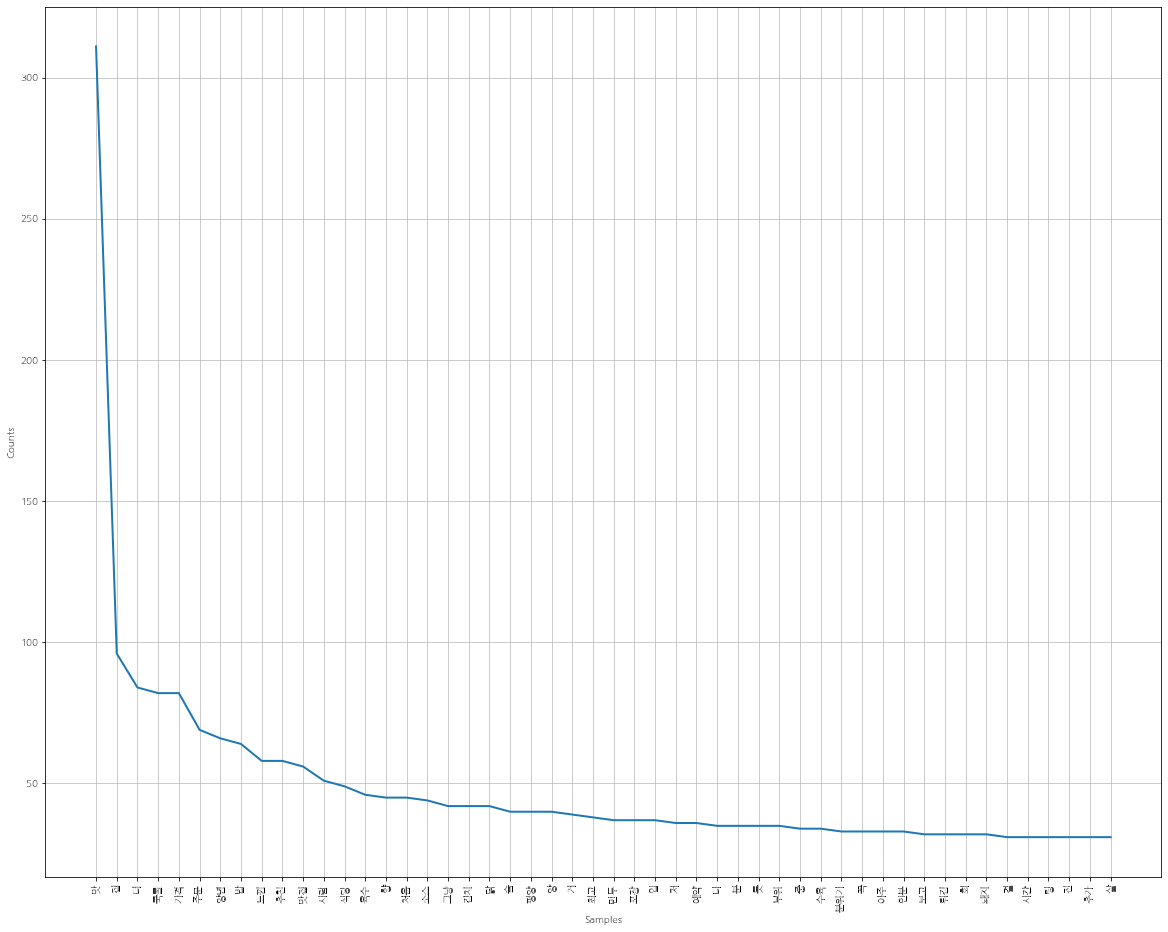

In [ ]:
new_ro2 = nltk.Text(new_ko, name="싸울아비 룬")
plt.figure(figsize=(20,16))
new_ro2.plot(50)

In [ ]:
hansik_mask = np.array(Image.open("ddokbargi.jpg"))

In [ ]:
data = new_ro2.vocab().most_common(1000)

In [ ]:
### 워드 클라우드 표현을 위한 데이터 생성
### 약간의 시간이 필요.
wc = WordCloud(background_color='white', 
max_words=200,
mask=hansik_mask,
contour_width=5, #외곽선
contour_color="steelblue",  # 색
font_path=path).generate_from_frequencies(dict(data))

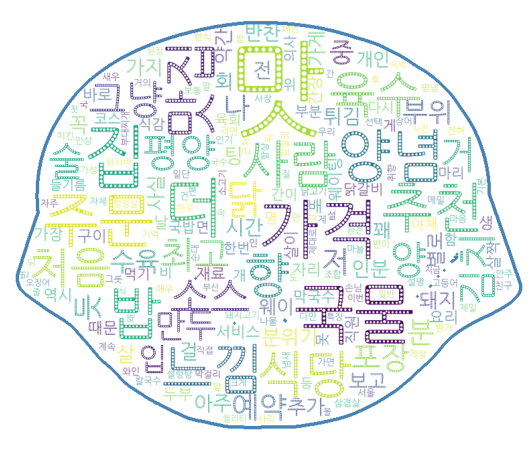

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.axis("off")
plt.show()